0.0001
0.00013987975951903808
0.00017975951903807618
0.00021963927855711424
0.0002595190380761523
0.0002993987975951904
0.0003392785571142285
0.0003791583166332665
0.0004190380761523046
0.0004589178356713427
0.0004987975951903809
0.0005386773547094188
0.0005785571142284569
0.000618436873747495
0.0006583166332665331
0.0006981963927855712
0.0007380761523046093
0.0007779559118236474
0.0008178356713426855
0.0008577154308617236
0.0008975951903807617
0.0009374749498997996
0.0009773547094188376
0.0010172344689378758
0.0010571142284569138
0.001096993987975952
0.00113687374749499
0.0011767535070140282
0.0012166332665330662
0.0012565130260521044
0.0012963927855711424
0.0013362725450901806
0.0013761523046092186
0.0014160320641282565
0.0014559118236472947
0.0014957915831663327
0.001535671342685371
0.001575551102204409
0.001615430861723447
0.001655310621242485
0.0016951903807615233
0.0017350701402805613
0.0017749498997995993
0.0018148296593186375
0.0018547094188376754
0.0018945891783567136
0.001934

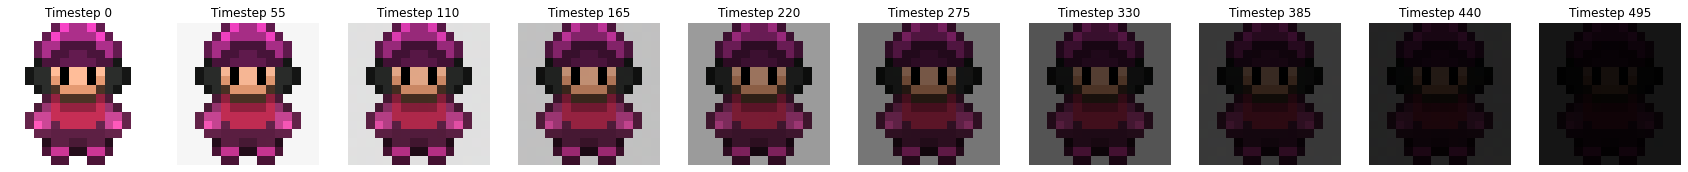

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create the initial image
x0 = np.array([
])

# Set parameters
timesteps = 500
beta = np.linspace(0.0001, 0.02, timesteps)  # Linear schedule from 0.0001 to 0.02
sqrt_1_minus_beta = np.sqrt(1 - beta)

# Prepare the images array
images = np.zeros((timesteps + 1, *x0.shape))
images[0] = x0

noise = np.zeros((timesteps+1, *x0.shape))
noise[0] =beta[0] * np.random.normal(0,1,x0.shape)

prev_images = np.zeros((timesteps + 1, *x0.shape))
prev_images[0] = x0
# Add noise over timesteps
for t in range(1, timesteps + 1):
    noise[t] = beta[t - 1] * np.random.normal(0, 1, x0.shape)
    images[t] = sqrt_1_minus_beta[t - 1] * images[t - 1] + noise[t]
    print(beta[t - 1])
    prev_images[t] = sqrt_1_minus_beta[t - 1] * prev_images[t - 1] 

# Select 10 images evenly spaced
step = timesteps // 9  # 9 because we want 10 images including timestep 0
selected_images = images[::step][:10]  # Select 10 images including the initial image
selected_noise = noise[::step][:10]
# Plot the selected images
fig, axes = plt.subplots(1, 10, figsize=(30, 3))  # Adjust the figure size as needed
for idx, t in enumerate(range(0, timesteps + 1, step)[:10]):
    axes[idx].imshow(selected_images[idx].astype(np.uint8))
    axes[idx].set_title(f'Timestep {t}')
    axes[idx].axis('off')

plt.show()



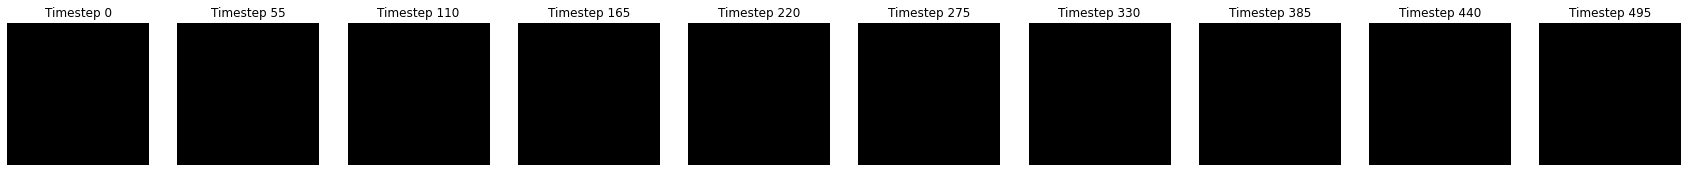

In [43]:
fig, axes = plt.subplots(1, 10, figsize=(30, 3))  # Adjust the figure size as needed
for idx, t in enumerate(range(0, timesteps + 1, step)[:10]):
    axes[idx].imshow(selected_noise[idx].astype(np.uint8))
    axes[idx].set_title(f'Timestep {t}')
    axes[idx].axis('off')
plt.show()

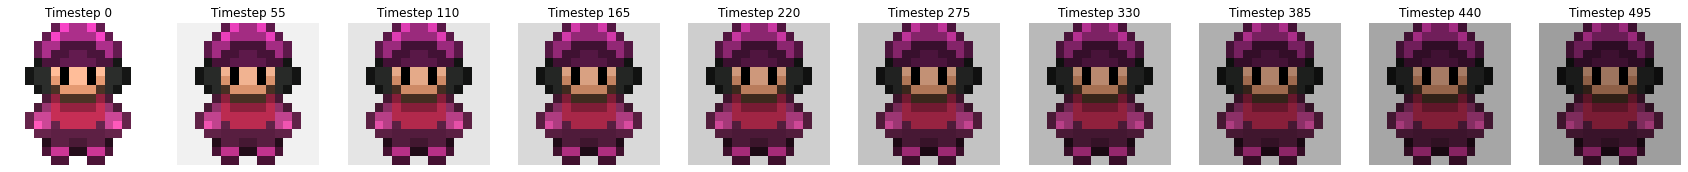

In [30]:
fig, axes = plt.subplots(1, 10, figsize=(30, 3))  # Adjust the figure size as needed
for idx, t in enumerate(range(0, timesteps + 1, step)[:10]):
    axes[idx].imshow(prev_images[idx].astype(np.uint8))
    axes[idx].set_title(f'Timestep {t}')
    axes[idx].axis('off')

plt.show()